In [1]:
import pandas as pd
from os import path
import src.utils.prep as prep 

df = prep.main()


In [ ]:
abc_cpv_names = {
    33: "medical instruments",
    45: "works",
    85: "healthcare services",
    79: "consulting services "
}
abc_procedure_names = {
    1: "open",
    26: "framework assignment",
    4: "negotiated",
    23: "assigment"
}

procedure_mask = df["id_award_procedure"] == 1
for item in abc_procedure_names:
    procedure_mask += df["id_award_procedure"] == item

cpv_mask = df["cpv"] == 33
for item in abc_cpv_names:
    cpv_mask += df["cpv"] == item

In [ ]:
import numpy as np
import matplotlib as mpl
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
data = df[cpv_mask]

x = np.log10(data["amount"])
y = np.log10(data["pa_med_ann_expenditure"])
z = np.log10(data["be_med_ann_revenue"])
s = ax.scatter(x, y, z, c=data["cpv"], alpha=.5)
legend = ax.legend(*s.legend_elements(), title="cpv")
ax.add_artist(legend) 
ax.set_xlabel("lot amount")
ax.set_ylabel("pa median annual expendidure")
ax.set_zlabel("be median annual revenue")
plt.show()


In [40]:
# define colors
import matplotlib.colors as mcolors

abc_procedure_names = {
    1: "open",
    26: "framework assignment",
    4: "negotiated",
    23: "assignment"
}

procedure_color_map = dict()
for p, c in zip(abc_procedure_names, mcolors.TABLEAU_COLORS):
    procedure_color_map[p] = c



df["proc_color"] = df["id_award_procedure"].map(procedure_color_map)

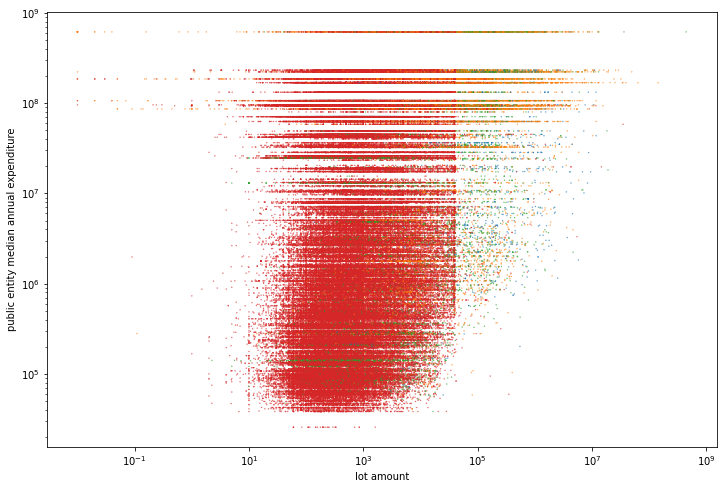

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
s = plt.scatter(
    df["amount"], df["pa_med_ann_expenditure"], c=df["proc_color"],
    s=0.1, alpha=1
)
plt.xlabel("lot amount")
plt.ylabel("public entity median annual expenditure")
plt.loglog()
plt.show()

In [22]:
df.columns

Index(['id_lotto', 'id_pa', 'object', 'id_award_procedure', 'amount',
       'start_date', 'data_fine', 'id_lsf', 'id_forma_giuridica',
       'uber_forma_giuridica', 'cpv', 'id_be', 'n_winners',
       'pa_med_ann_expenditure', 'be_med_ann_revenue', 'pa_med_ann_contr',
       'be_med_ann_contr', 'pa_med_ann_n_contr', 'be_med_ann_n_contr',
       'duration', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'sinMonth', 'cosMonth', 'daysSinceBaseDate', 'min_nlots_id_be',
       'min_nlots_id_pa', 'outlier', 'proc_color'],
      dtype='object')

In [83]:
abc_cpv_names = {
    33: "medical instruments",
    45: "works",
    85: "healthcare services",
    79: "consulting services "
}
abc_procedure_names = {
    1: "open",
    26: "framework assignment",
    4: "negotiated",
    23: "assigment"
}

procedure_mask = df["id_award_procedure"] == 1
for item in abc_procedure_names:
    procedure_mask += df["id_award_procedure"] == item

cpv_mask = df["cpv"] == 33
for item in abc_cpv_names:
    cpv_mask += df["cpv"] == item

colors = dict()
abc_names = {
    33: "medical instruments",
    45: "works",
    85: "healthcare services",
    79: "consulting services ",
    1: "open",
    26: "framework assignment",
    4: "negotiated",
    23: "assigment"
}
for i, item in enumerate(abc_names):
    colors[item] = i
colors

{33: 0, 45: 1, 85: 2, 79: 3, 1: 4, 26: 5, 4: 6, 23: 7}

In [98]:
procedure_mask = df["id_award_procedure"] == 1
for item in abc_procedure_names:
    procedure_mask += df["id_award_procedure"] == item

cpv_mask = df["cpv"] == 33
for item in abc_cpv_names:
    cpv_mask += df["cpv"] == item

abc_names = {
    33: "medical instruments",
    45: "works",
    85: "healthcare services",
    79: "consulting services ",
    1: "open",
    26: "framework assignment",
    4: "negotiated",
    23: "assigment"
}

id_to_color = dict()
color_to_id = dict()
for i, item in enumerate(abc_names):
    id_to_color[item] = i
    color_to_id[i] = item

def _forward(s: pd.Series) -> pd.Series:
    return s.map(id_to_color)


def _inverse(s: pd.Series) -> pd.Series:
    return s.map(color_to_id)
    
norm = mpl.colors.FuncNorm((_forward, _inverse), vmax=1, vmin=0)

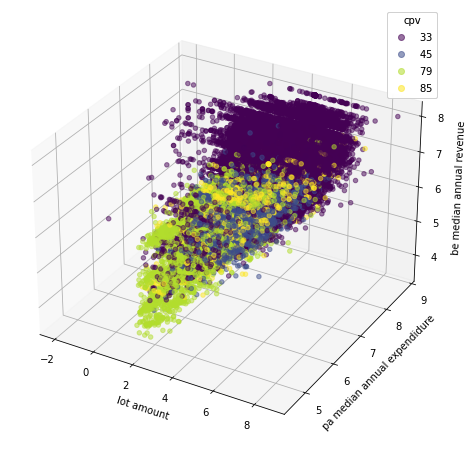

In [101]:
import numpy as np
import matplotlib as mpl
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
data = df[cpv_mask]

x = np.log10(data["amount"])
y = np.log10(data["pa_med_ann_expenditure"])
z = np.log10(data["be_med_ann_revenue"])
s = ax.scatter(x, y, z, c=data["cpv"], alpha=.5)
legend = ax.legend(*s.legend_elements(), title="cpv")
ax.add_artist(legend) 
ax.set_xlabel("lot amount")
ax.set_ylabel("pa median annual expendidure")
ax.set_zlabel("be median annual revenue")
plt.show()


NameError: name 'procedure_mask' is not defined

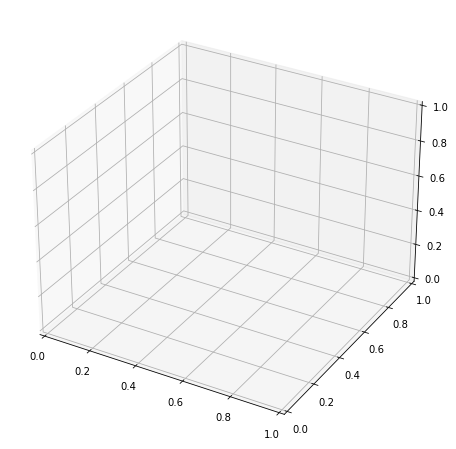

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
data = df[procedure_mask]
x = np.log10(data["amount"])
y = np.log10(data["pa_med_ann_expenditure"])
z = np.log10(data["be_med_ann_revenue"])
s = ax.scatter(x, y, z, c=data["id_award_procedure"], alpha=.5, cmap=mpl.colormaps("plasma"))
legend = ax.legend(*s.legend_elements(), title="procedure id")
ax.add_artist(legend) 
ax.set_xlabel("lot amount")
ax.set_ylabel("pa median annual expendidure")
ax.set_zlabel("be median annual revenue")
plt.show()

In [114]:
import pandas as pd
from os import path
import src.utils.prep as prep 

df = prep.main()

In [116]:
df.columns

Index(['id_lotto', 'id_pa', 'object', 'id_award_procedure', 'amount',
       'start_date', 'data_fine', 'id_lsf', 'id_forma_giuridica',
       'uber_forma_giuridica', 'cpv', 'id_be', 'n_winners',
       'pa_med_ann_expenditure', 'be_med_ann_revenue', 'pa_med_ann_contr',
       'be_med_ann_contr', 'pa_med_ann_n_contr', 'be_med_ann_n_contr',
       'duration', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'sinMonth', 'cosMonth', 'daysSinceBaseDate', 'min_nlots_id_be',
       'min_nlots_id_pa', 'outlier'],
      dtype='object')

In [4]:
import src.utils.prep as prep 
df = prep.load_dataset()
df = prep.split_sum_totals(df)
# remove the resulting duplicates
df = df[~df.duplicated()]
df = prep.feature_extraction(df)

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
df = prep.main()
t = pd.concat([df.groupby("cpv")["amount"].sum().sort_values(ascending=False), df.groupby("id_scelta_contraente").size().rename("lot_count")], axis=1)
data = (t["amount"]/ t["lot_count"]).sort_values(ascending=False)

coords = range(len(data))
height = data.values

plt.figure(figsize=(16, 8))
plt.bar(coords, t["amount"], tick_label=data.index)

KeyError: 'Column not found: importo'

In [23]:
pd.read_csv("synData6July/tipi_procedure.csv")

,id_scelta_contraente,procedura,tipo_procedura
0,23,AFFIDAMENTO DIRETTO,affidamento
1,8,AFFIDAMENTO IN ECONOMIA - COTTIMO FIDUCIARIO,affidamento
2,17,AFFIDAMENTO DIRETTO EX ART. 5 DELLA LEGGE 381/91,affidamento
3,24,AFFIDAMENTO DIRETTO A SOCIETA' IN HOUSE,affidamento
4,25,AFFIDAMENTO DIRETTO A SOCIETA' RAGGRUPPATE/CON...,affidamento
5,31,AFFIDAMENTO DIRETTO PER VARIANTE SUPERIORE AL ...,affidamento
6,32,AFFIDAMENTO RISERVATO,affidamento
7,36,AFFIDAMENTO DIRETTO PER LAVORI SERVIZI O FORNI...,affidamento
8,4,PROCEDURA NEGOZIATA SENZA PREVIA PUBBLICAZIONE,negoziata
9,6,PROCEDURA NEGOZIATA SENZA PREVIA INDIZIONE DI ...,negoziata


In [1]:
import src.utils.prep as prep 
df = prep.main()

In [13]:
df.columns

Index(['id_lotto', 'id_pa', 'object', 'id_award_procedure', 'amount',
       'start_date', 'data_fine', 'id_lsf', 'id_forma_giuridica',
       'uber_forma_giuridica', 'cpv', 'id_be', 'n_winners',
       'pa_med_ann_expenditure', 'be_med_ann_revenue', 'pa_med_ann_contr',
       'be_med_ann_contr', 'pa_med_ann_n_contr', 'be_med_ann_n_contr',
       'duration', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'sinMonth', 'cosMonth', 'daysSinceBaseDate', 'min_nlots_id_be',
       'min_nlots_id_pa', 'OUTLIER'],
      dtype='object')

Text(0.5, 1.0, 'open procedure lots, Veneto, 2016-2018')

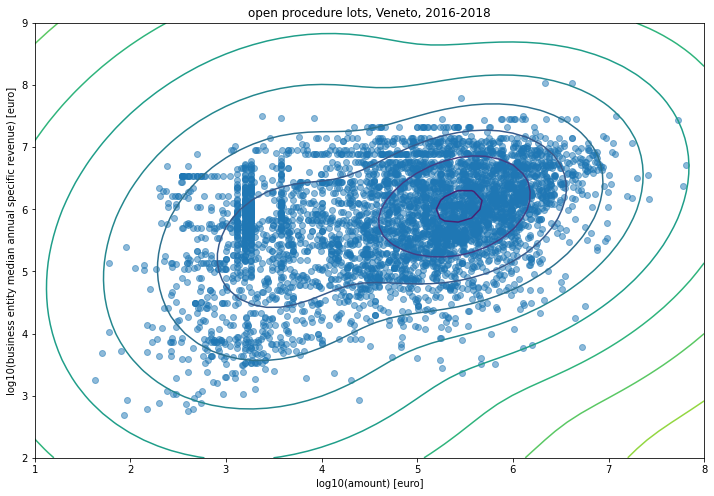

In [51]:
from sklearn import mixture
import numpy as np
from matplotlib.colors import LogNorm
X_train = df[df["id_award_procedure"] == 1]
X_train = np.array(X_train[["amount", "be_med_ann_revenue"]])
X_train = np.log10(X_train)
clf = mixture.GaussianMixture(n_components=2, covariance_type="full")
clf.fit(X_train)
x = np.linspace(1, 8)
y = np.linspace(2, 9)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

plt.figure(figsize=(12, 8))
CS = plt.contour(
    X, Y, Z, norm=LogNorm(vmin=1.0, vmax=50), levels=np.logspace(0, 3, 20)
)
# CB = plt.colorbar(CS, shrink=0.8, extend="both")
plt.scatter(X_train[:, 0], X_train[:, 1], alpha=.5)
plt.xlabel("log10(amount) [euro]")
plt.ylabel("log10(business entity median annual specific revenue) [euro]")
plt.title("open procedure lots, Veneto, 2016-2018")


Text(0.5, 1.0, 'negotiated procedure lots, Veneto, 2016-2018')

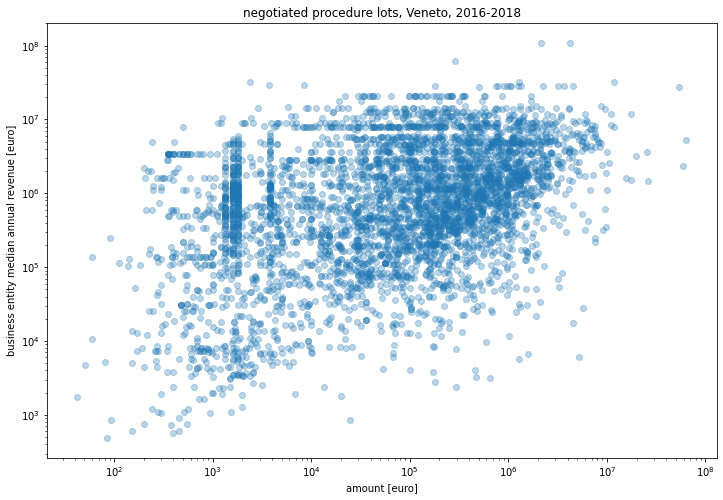

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
data = df[df["id_award_procedure"] == 1]
plt.figure(figsize=(12, 8))
plt.scatter(data["amount"], data["be_med_ann_revenue"], alpha=.3)
plt.loglog()
plt.xlabel("amount [euro]")
plt.ylabel("business entity median annual revenue [euro]")
plt.title("open procedure lots, Veneto, 2016-2018")


In [52]:
t = df[["be_med_ann_revenue", "min_nlots_id_be"]]
t = t[~t.duplicated()]
t["magnitude"] = np.floor(np.log10(t["be_med_ann_revenue"])).astype("int")

(8, 24)


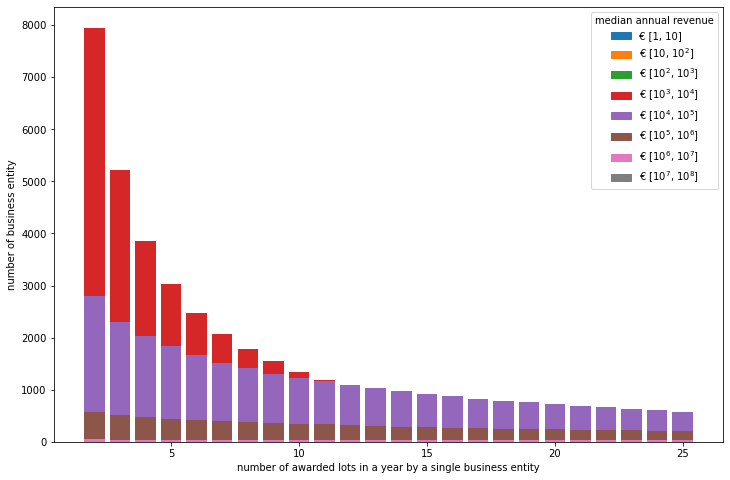

In [70]:
from matplotlib.patches import Patch
N = 26
M = len(set(t["magnitude"]))
data = pd.DataFrame.from_dict({1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0}, "index")
for n in range(2, N):
    tab = t[t["min_nlots_id_be"] >= n]
    tab = tab.groupby("magnitude").size().rename(n)
    data = pd.concat([data, tab], axis=1)
data = data.drop(columns=[0])
data = np.nan_to_num(np.array(data))
# data = data / np.sum(data, axis=0)

fig, ax = plt.subplots(figsize=(12, 8))
labels = list(range(2, N))
print(data.shape)
for i in range(data.shape[0]):
    ax.bar(labels, data[i, :], label=i+1)

custom_patches = [
    Patch(color="tab:blue"),
    Patch(color="tab:orange"),
    Patch(color="tab:green"),
    Patch(color="tab:red"),
    Patch(color="tab:purple"),
    Patch(color="tab:brown"),
    Patch(color="tab:pink"),
    Patch(color="tab:grey"),
]
custom_labels = [
    "€ [1, 10]",
    "€ [10, $10^2$]",
    "€ [$10^2$, $10^3$]",
    "€ [$10^3$, $10^4$]",
    "€ [$10^4$, $10^5$]",
    "€ [$10^5$, $10^6$]",
    "€ [$10^6$, $10^7$]",
    "€ [$10^7$, $10^8$]"
]
plt.legend(custom_patches, custom_labels, title="median annual revenue")

plt.xlabel("number of awarded lots in a year by a single business entity")
plt.ylabel("number of business entity")
plt.show()

In [55]:
df.columns

Index(['id_lotto', 'id_pa', 'object', 'id_award_procedure', 'amount',
       'start_date', 'data_fine', 'id_lsf', 'id_forma_giuridica',
       'uber_forma_giuridica', 'cpv', 'id_be', 'n_winners',
       'pa_med_ann_expenditure', 'be_med_ann_revenue', 'pa_med_ann_contr',
       'be_med_ann_contr', 'pa_med_ann_n_contr', 'be_med_ann_n_contr',
       'duration', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'sinMonth', 'cosMonth', 'daysSinceBaseDate', 'min_nlots_id_be',
       'min_nlots_id_pa', 'outlier'],
      dtype='object')

In [157]:
N = 26
M = len(set(t["magnitude"]))
data = pd.DataFrame.from_dict({1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0}, "index")
for n in range(2, N):
    tab = t[t["min_nlots_id_be"] == n]
    tab = tab.groupby("magnitude").size().rename(n)
    data = pd.concat([data, tab], axis=1)
data = data.drop(columns=[0])

In [5]:
import src.utils.prep as prep 
df = prep.main()

In [8]:
df["OUTLIER"] = df["OUTLIER"].map({True: -1, False: 1})

In [10]:
df["OUTLIER"] = df["OUTLIER"].fillna(0)

In [11]:
df[df["id_award_procedure"] == 1].shape

(2349, 37)

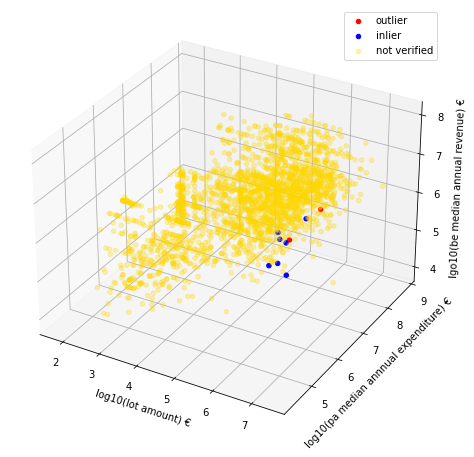

In [38]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
data = df[df["id_award_procedure"] == 1]

# for category, color, label in zip([0, -1, 1], ["gold", "red", "blue"], ["unknown", "outlier", "inlier"]):
for category, color, label in zip([-1, 1, 0], ["red", "blue", "gold"], ["outlier", "inlier", "not verified"]):
    d = data[data["OUTLIER"] == category]
    x = np.log10(d["amount"])
    y = np.log10(d["pa_med_ann_expenditure"])
    z = np.log10(d["be_med_ann_revenue"])
    if color == "gold":
        ax.scatter(x, y, z, c=color, alpha=.3, label=label)
    else:
        ax.scatter(x, y, z, c=color, alpha=1, label=label)
# legend = ax.legend(*s.legend_elements())
ax.legend()

ax.set_xlabel("log10(lot amount) €")
ax.set_ylabel("log10(pa median annnual expenditure) €")
ax.set_zlabel("lgo10(be median annual revenue) €")
# ax.set_title("open procedure")
plt.show()

In [37]:
df[df["id_award_procedure"] == 1]

,id_lotto,id_pa,object,id_award_procedure,amount,start_date,data_fine,id_lsf,id_forma_giuridica,uber_forma_giuridica,...,month_9,month_10,month_11,month_12,sinMonth,cosMonth,daysSinceBaseDate,min_nlots_id_be,min_nlots_id_pa,OUTLIER
11,3316126,2435,"Catetere a palloncino a basso profilo, non com...",1,340800.0,2017-05-01,2022-04-30,3,139,Sanità,...,0,0,0,0,5.000000e-01,-8.660254e-01,486,154.0,2077.0,0.0
350,3798492,2997,Servizio Approvvigionamenti - Procedura aperta...,1,2425.5,2016-07-01,2018-06-30,3,135,Sanità,...,0,0,0,0,-5.000000e-01,-8.660254e-01,182,33.0,1054.0,0.0
819,1943979,12073,Servizio di vigilanza edifici comunali dal 1.1...,1,39690.0,2016-01-01,2018-05-31,2,15,Amministrazione regionale e locale,...,0,0,0,0,5.000000e-01,8.660254e-01,0,61.0,237.0,0.0
827,4090266,33034,BS256-15/AP PROCEDURA APERTA PER L'AFFIDAMENTO...,1,8671155.0,2016-03-03,2021-12-31,2,176,Società privata e cooperazione fra imprese,...,0,0,0,0,1.000000e+00,6.123234e-17,62,30.0,1442.0,0.0
892,7439458,35871,FORNITURA DI GASOLIO AGRICOLO PER IL BIENNIO 2...,1,196000.0,2017-03-01,2018-12-28,3,75,Ente pubblico non economico,...,0,0,0,0,1.000000e+00,6.123234e-17,425,180.0,514.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387222,3397423,37026,AVVISO PUBBLICO PER STIPULAZIONE DI UN ACCORDO...,1,1288000.0,2017-07-01,2017-12-31,2,11,Amministrazione dello Stato,...,0,0,0,0,-5.000000e-01,-8.660254e-01,547,15.0,47.0,0.0
387223,3397423,37026,AVVISO PUBBLICO PER STIPULAZIONE DI UN ACCORDO...,1,1288000.0,2017-07-01,2017-12-31,2,11,Amministrazione dello Stato,...,0,0,0,0,-5.000000e-01,-8.660254e-01,547,27.0,47.0,0.0
387458,2288127,2435,"Filtro cavale permanente autocentrante, ad int...",1,180000.0,2017-05-01,2022-04-30,3,139,Sanità,...,0,0,0,0,5.000000e-01,-8.660254e-01,486,44.0,2077.0,0.0
387512,18090424,32890,ACQUISTO HARDWARE 4 SURFACE PRO PIÙ ACCESSORI ...,1,6000.0,2018-12-12,2018-12-12,3,124,Istruzione e ricerca,...,0,0,0,1,-2.449294e-16,1.000000e+00,1076,263.0,8492.0,0.0


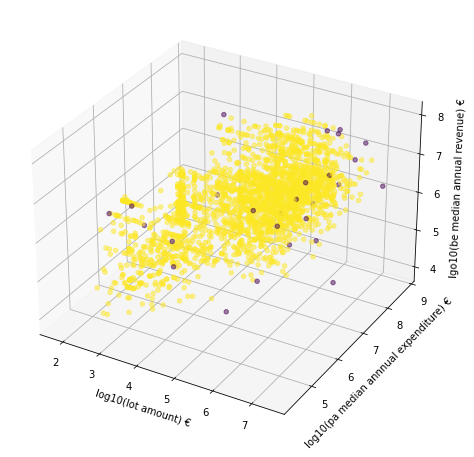

In [74]:
import pandas as pd
results = pd.read_csv("output/281022-105529_aperta_oc-svm/aperta_oc-svm.csv")
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
data = results

x = np.log10(data["amount"])
y = np.log10(data["pa_med_ann_expenditure"])
z = np.log10(data["be_med_ann_revenue"])
s = ax.scatter(x, y, z, c=data["score"], alpha=.5)
# legend = ax.legend(*s.legend_elements())
# ax.add_artist(legend) 

ax.set_xlabel("log10(lot amount) €")
ax.set_ylabel("log10(pa median annnual expenditure) €")
ax.set_zlabel("lgo10(be median annual revenue) €")
plt.show()

In [90]:
results = pd.read_csv("output/281022-105529_aperta_oc-svm/aperta_oc-svm.csv")
results["OUTLIER"] = results["OUTLIER"].map({True:-1, False:1})
results["OUTLIER"] = results["OUTLIER"].fillna(0)
results["OUTLIER"] = results["OUTLIER"].astype("int")

In [96]:
results[results["OUTLIER"] == results["score"]][["OUTLIER", "score"]]
results[results["OUTLIER"] == -1][["OUTLIER", "score"]]

,OUTLIER,score
78,-1,1
1318,-1,1


In [92]:
sum(results["OUTLIER"] == -1)

2

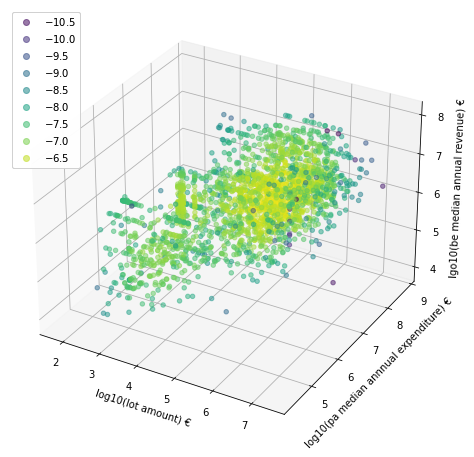

In [75]:
results = pd.read_csv("output/281022-112536_aperta_kde/aperta_kde.csv")
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
data = results

x = np.log10(data["amount"])
y = np.log10(data["pa_med_ann_expenditure"])
z = np.log10(data["be_med_ann_revenue"])
s = ax.scatter(x, y, z, c=data["score"], alpha=.5)
legend = ax.legend(*s.legend_elements())
ax.add_artist(legend) 

ax.set_xlabel("log10(lot amount) €")
ax.set_ylabel("log10(pa median annnual expenditure) €")
ax.set_zlabel("lgo10(be median annual revenue) €")
plt.show()

In [85]:
results["OUTLIER"] = results["OUTLIER"].map({True:-1, False:1})
results["OUTLIER"] = results["OUTLIER"].fillna(0)
results["OUTLIER"] = results["OUTLIER"].astype("int")

In [100]:
results["flag"] = results["score"] < -10
results["flag"] = results.flag.map({True: -1, False: 1})
results[results["OUTLIER"] == results["flag"]][["OUTLIER", "flag"]]
results[results["OUTLIER"] == -1][["OUTLIER", "flag"]]

,OUTLIER,flag
78,-1,1
1318,-1,1


In [104]:
np.sum(results["OUTLIER"] == -1)

2

In [16]:
# MERGE CHECKED OUTLIERS FROM GOOGLE SHEETS
import pandas as pd
outliers_checked = pd.read_csv("output/checked_outliers.csv", index_col=0)
df.merge(outliers_checked, how="left", on="id_lotto").sort_values("OUTLIER", ascending=False)

,id_lotto,id_pa,object,id_award_procedure,amount,start_date,data_fine,id_lsf,id_forma_giuridica,uber_forma_giuridica,...,month_9,month_10,month_11,month_12,sinMonth,cosMonth,daysSinceBaseDate,min_nlots_id_be,min_nlots_id_pa,OUTLIER
10251,11146404,21656,NUOVA VENETA UFFICIO - NOLEGGIO FOTOCOPIATORI,23,3.512050e+05,2018-01-01,2018-12-31,3,103,Istruzione e ricerca,...,0,0,0,0,5.000000e-01,0.866025,731,26.0,54.0,True
164297,7115947,24651,Gara d' appalto regionale a mezzo procedura ap...,27,3.086240e+07,2017-04-26,2019-04-25,3,135,Sanità,...,0,0,0,0,8.660254e-01,-0.500000,481,45.0,144.0,True
371603,14180711,23269,Acquisto materiale igienico e sanitario,23,1.670760e+05,2016-10-04,2016-10-24,3,103,Istruzione e ricerca,...,0,1,0,0,-8.660254e-01,0.500000,277,64.0,76.0,True
251108,13751505,2998,FORNITURA E POSA CONDIZIONATORI LOTTO DISTRETT...,4,2.000000e+08,2018-07-26,2020-07-25,3,135,Sanità,...,0,0,0,0,-5.000000e-01,-0.866025,937,11.0,3508.0,True
238799,18386779,12689,AFFIDAMENTO DEL SERVIZIO ENERGIA DEGLI IMPIANT...,1,2.238000e+06,2016-02-16,2016-12-31,2,15,Amministrazione regionale e locale,...,0,0,0,0,8.660254e-01,0.500000,46,58.0,63.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387562,3092162,8853,ACQUISTO VOLUME CODICE AMMINISTRAZIONE DIGITALE,23,2.800000e+01,2016-11-28,2016-12-31,3,15,Amministrazione regionale e locale,...,0,0,1,0,-5.000000e-01,0.866025,332,1645.0,96.0,NaN
387563,700162,626,ACQUISTO ADESIVI,23,1.880000e+03,2018-04-30,2018-06-12,3,176,Società privata e cooperazione fra imprese,...,0,0,0,0,8.660254e-01,-0.500000,850,108.0,1391.0,NaN
387564,2250926,2992,ACQUISTO MATERIALE IMPIANTABILE DI ORTOPEDIA P...,23,2.000000e+04,2017-07-18,2017-12-31,3,135,Sanità,...,0,0,0,0,-5.000000e-01,-0.866025,564,24.0,756.0,NaN
387565,3096334,6556,INTEGRAZIONE IMPEGNO E LIQUIDAZIONE DI SPESA P...,23,2.656000e+01,2016-12-02,2016-12-31,3,15,Amministrazione regionale e locale,...,0,0,0,1,-2.449294e-16,1.000000,336,428.0,42.0,NaN
